In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

#We have two distributions with two features and we are generating two distributions with them 
# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


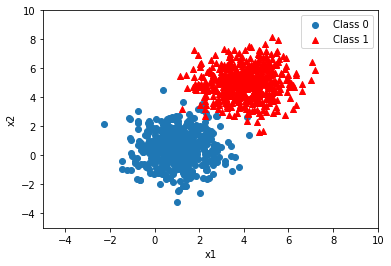

In [3]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [4]:
data = np.zeros((1000,3))
print(data.shape)
#Creating a blank matrix with 1000 rows and three columns
#Two columns will have the variables while the third will have the value to identify the distribution

(1000, 3)


In [5]:
data[:500,:2] = dist_01 #Put first distribution in first 500 rows
data[500:,:2] = dist_02 #Put second distribution in last 500 rows
data[500:,-1] = 1.0 #Labelled the second distribution as 1
#Now the dataset is ready

In [6]:
np.random.shuffle(data)
print(data[:10])
#Shuffled the data a little bit

[[ 3.22607419  4.98405952  1.        ]
 [ 2.78905494  2.72782484  0.        ]
 [ 0.49477642  1.03245935  0.        ]
 [ 0.30207083  0.87888642  0.        ]
 [ 2.01136474  4.85117105  1.        ]
 [ 6.11380352  4.93184976  1.        ]
 [-0.12475507  0.22222449  0.        ]
 [ 2.5135065   5.67957376  1.        ]
 [ 4.0398178   4.15698265  1.        ]
 [ 3.40990947 -0.04409419  0.        ]]


In [7]:
split = int(0.8*data.shape[0]) #We will include 80% in training set while rest will go to test
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)


(800, 2) (200, 2)
(800,) (200,)


In [10]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b #Doing dot ensures we don't need to use loop to multiply both variables with their respective weights
    return sigmoid(h)
    #Calculating the score on the basis of weight and variable's value + bias
    #Then simply put that value in sigmoid to get a value between 0 and 1
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx) #This is simply LL function which we need to maximize
        
    
    return -err/m #Negative of LL


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx) #Basically multiplies by x[0] which is 1
        
    
    grad_w /= m
    grad_b /= m #Average Error and Average Gradient
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    loss = []
    for i in range(100):
        err = error(y_true,x,w,b)
        loss.append(err)
        [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
        w = w + learning_rate*grad_w
        b = b + learning_rate*grad_b
    #So after applying gradient descent our weights and biases are updating themselves 
    return loss,w,b
    


In [9]:
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [12]:
w = 2*np.random.random((X_train.shape[1],))#Taking same number of random variables as weights
b = 5*np.random.random()#Taking a random bias
loss = []
loss,w,b = grad_descent(X_train,Y_train,w,b,learning_rate=0.1)
acc = get_acc(X_test,Y_test,w,b)
print(loss)
print(acc)

[3.795755919436591, 3.7077677227513557, 3.6199087981913785, 3.5321920561702007, 3.444632097371187, 3.3572454956703606, 3.2700511438944613, 3.183070680737197, 3.096329023584167, 3.009855040862144, 2.92368240973584, 2.8378507216937328, 2.7524069212451834, 2.6674071932148173, 2.5829194534348523, 2.4990266464542104, 2.4158311097579634, 2.3334603177143425, 2.2520743466985693, 2.1718753550894987, 2.0931191498758412, 2.016128343263146, 1.9413054256200537, 1.8691419881251559, 1.80021719209258, 1.735175037698572, 1.6746684151193665, 1.619263104765489, 1.569311990827925, 1.5248369821264136, 1.485476001301779, 1.4505378422936233, 1.4191532128231632, 1.3904546728889589, 1.3637105352276386, 1.3383794869859964, 1.3141001696904808, 1.2906495341924837, 1.2678974149782973, 1.245770374110942, 1.2242272729452626, 1.2032443597024083, 1.1828067555342747, 1.1629038108593541, 1.1435266547453788, 1.1246669371662605, 1.106316204562307, 1.0884656077291976, 1.0711057838558382, 1.0542268304394282, 1.0378183282138

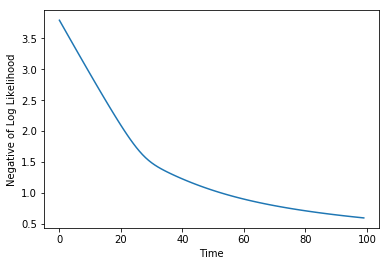

In [13]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

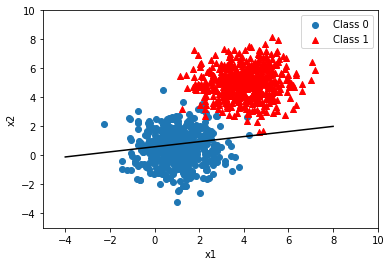

In [15]:
plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='k')
#Equation should be w0x0+w1xi+b=0 for every point, hence we got line equation accordingly
plt.legend()
plt.show()
